In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [37]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

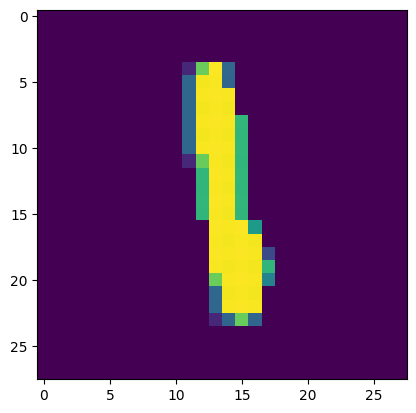

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x_train[200])

In [41]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [42]:
x_train=x_train/255
x_test=x_test/255

In [43]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [47]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2854 - accuracy: 0.9171 - val_loss: 0.1428 - val_accuracy: 0.9590
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1188 - accuracy: 0.9650 - val_loss: 0.1296 - val_accuracy: 0.9604
Epoch 3/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.0820 - accuracy: 0.9754 - val_loss: 0.1195 - val_accuracy: 0.9657
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.1129 - val_accuracy: 0.9677
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0492 - accuracy: 0.9836 - val_loss: 0.1362 - val_accuracy: 0.9639
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0408 - accuracy: 0.9864 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.1209 - val_accuracy:

In [48]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [49]:
y_pred=y_prob.argmax(axis=1)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

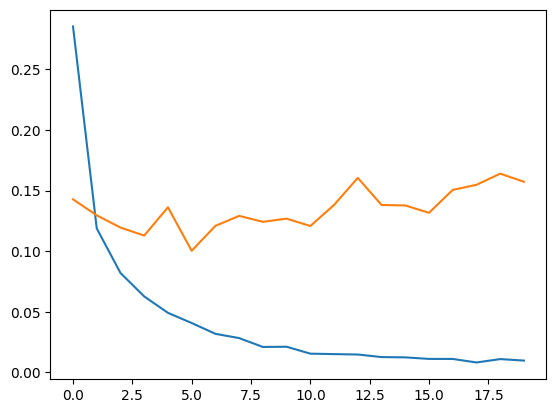

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

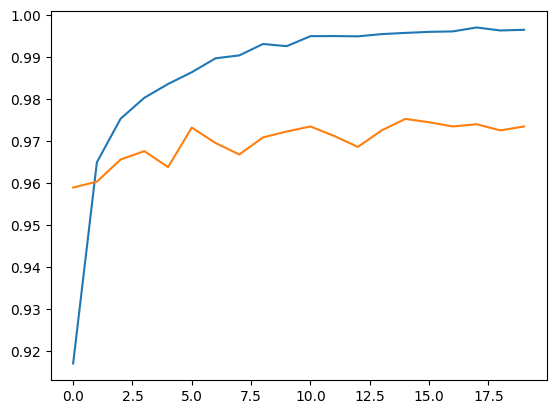

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

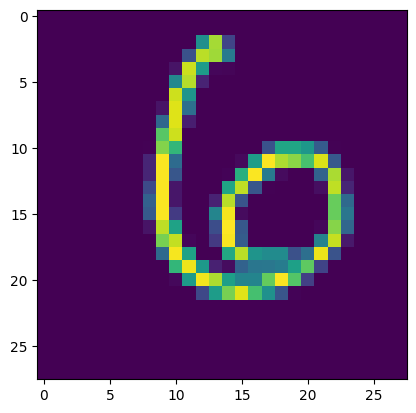

In [59]:
plt.imshow(x_test[100])

In [58]:
model.predict(x_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([6])